# ConvNet from Scratch

In [25]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np


In [26]:
def plot_metrics(h, title=""):
    """ Plot training metrics - loss and accuracy, for each epoch, 
        given a training history object
    """
    fig, axes = plt.subplots(1,2, figsize=(10,5))
      
    axes[0].plot(h.history['loss'], color="lightblue", label="Training", lw=2.0)
    axes[0].plot(h.history['val_loss'], color="steelblue", label="Validation", lw=2.0)

    axes[0].set_title("{} (Loss)".format(title))
    axes[0].set_xlabel("Epoch")
    axes[0].set_xticks(np.arange(len(h.history["loss"]), 2))
    axes[0].set_ylabel("Loss")
    
    axes[1].plot(h.history['acc'], color="lightblue", label="Training", lw=2.0)
    axes[1].plot(h.history['val_acc'], color="steelblue", label="Validation", lw=2.0)
    
    axes[1].set_title("{} (Accuracy)".format(title))
    axes[1].set_xlabel("Epoch")
    axes[1].set_xticks(np.arange(len(h.history["acc"]), 2))
    axes[1].set_ylabel("Accuracy")
    

    for axis in axes:
        axis.ticklabel_format(useOffset=False)
        axis.spines["top"].set_visible(False)
        axis.spines["right"].set_visible(False)
        axis.legend(loc='best', shadow=False)
    fig.tight_layout()

In [34]:
# dimensions of our images.
img_width, img_height = 72, 72

train_data_dir = r'C:\Users\ankit\Downloads\Success\OriginalTrain'
validation_data_dir = r'C:\Users\ankit\Downloads\Success\OriginalValidate'



In [35]:
nb_train_samples = 80
nb_validation_samples = 20
epochs = 10
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])



In [36]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

model_metrics= model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('first_try.h5')

Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/10
5/5 [==============================] - 4s 857ms/step - loss: 0.7399 - acc: 0.4250 - val_loss: 0.6954 - val_acc: 0.3750
Epoch 2/10
5/5 [==============================] - 4s 739ms/step - loss: 0.7050 - acc: 0.3750 - val_loss: 0.6967 - val_acc: 0.2500
Epoch 3/10
5/5 [==============================] - 4s 774ms/step - loss: 0.6947 - acc: 0.4000 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 4/10
5/5 [==============================] - 4s 714ms/step - loss: 0.6989 - acc: 0.4750 - val_loss: 0.6927 - val_acc: 0.5000
Epoch 5/10
5/5 [==============================] - 4s 801ms/step - loss: 0.6946 - acc: 0.4750 - val_loss: 0.6920 - val_acc: 0.5000
Epoch 6/10
5/5 [==============================] - 4s 766ms/step - loss: 0.6976 - acc: 0.4750 - val_loss: 0.6895 - val_acc: 0.5000
Epoch 7/10
5/5 [==============================] - 4s 880ms/step - loss: 0.6930 - acc: 0.5375 - val_loss: 0.6994 - val_acc: 0.5000
Epoch 8/10

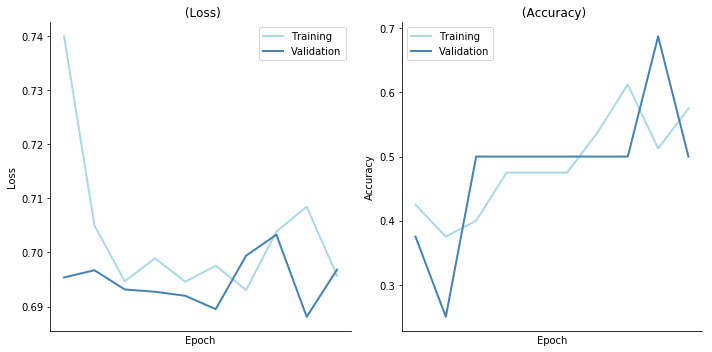

In [37]:
plot_metrics(model_metrics)

In [82]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

# dimensions of our images.
img_width, img_height = 72, 72

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = r'C:\Users\ankit\Downloads\Success\train'
validation_data_dir = r'C:\Users\ankit\Downloads\Success\validate'
nb_train_samples = 80
nb_validation_samples = 20
epochs = 50
batch_size = 16


def save_bottlebeck_features():
    datagen = ImageDataGenerator(rescale=1. / 255)

    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')

    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_train = model.predict_generator(
        generator, nb_train_samples // batch_size)
    np.save(open('bottleneck_features_train.npy','wb'),
            bottleneck_features_train)

    generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_validation = model.predict_generator(
        generator, nb_validation_samples // batch_size)
    np.save(open('bottleneck_features_validation.npy', 'wb'),
            bottleneck_features_validation)


def train_top_model():
    train_data = np.load(open('bottleneck_features_train.npy', encoding='UTF-8'))
    train_labels = np.array(
        [0] * (nb_train_samples / 2) + [1] * (nb_train_samples / 2))

    validation_data = np.load(open('bottleneck_features_validation.npy', encoding='UTF-8'))
    validation_labels = np.array(
        [0] * (nb_validation_samples / 2) + [1] * (nb_validation_samples / 2))

    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(train_data, train_labels,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(validation_data, validation_labels))
    model.save_weights(top_model_weights_path)


save_bottlebeck_features()
train_top_model()

Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 0: invalid start byte

In [107]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
file=(r'C:\Users\ankit\Downloads\Success\train\Mutant') 


for f in os.walk(file):
    
    #img = load_img(f)  # this is a PIL image
    x = img_to_array(f)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i=0
    for batch in datagen.flow(x, batch_size=1,
                          save_to_dir=r'C:\Users\ankit\Downloads\Success\train\Mutant', save_prefix='cropped', save_format='jpeg'):
        i += 1
        if i > 20:
            break





ValueError: could not convert string to float: 'C:\\Users\\ankit\\Downloads\\Success\\train\\Mutant'

# Data Augmentation

In [119]:
import cv2
import glob
myFiles= (glob.glob(r"C:\Users\ankit\Downloads\Success\validate\mutant\*.jpg"))



In [120]:
for f in myFiles:
    im_path = f
    img = cv2.imread(im_path)
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i=0
    for batch in datagen.flow(x, batch_size=1,
                          save_to_dir=r'C:\Users\ankit\Downloads\Success\validate\mutant', save_prefix='cropped', save_format='jpeg'):
        i += 1
        if i > 20:
            break

# ConvNet on Augmented Data Set

In [5]:
# dimensions of our images.
img_width, img_height = 72, 72

train_data_dir = r'C:\Users\ankit\Downloads\Success\train'
validation_data_dir = r'C:\Users\ankit\Downloads\Success\validate'


In [122]:
nb_train_samples = 1685
nb_validation_samples = 437
epochs = 10
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('first_try.h5')

Found 1685 images belonging to 2 classes.
Found 437 images belonging to 2 classes.
Epoch 1/50
105/105 [==============================] - 88s 839ms/step - loss: 0.7055 - acc: 0.5081 - val_loss: 0.6940 - val_acc: 0.4306
Epoch 2/50
105/105 [==============================] - 89s 843ms/step - loss: 0.6927 - acc: 0.5320 - val_loss: 0.7253 - val_acc: 0.5059
Epoch 3/50
105/105 [==============================] - 86s 823ms/step - loss: 0.6850 - acc: 0.5581 - val_loss: 0.7273 - val_acc: 0.5321
Epoch 4/50
105/105 [==============================] - 89s 849ms/step - loss: 0.6850 - acc: 0.5839 - val_loss: 0.9199 - val_acc: 0.4561
Epoch 5/50
105/105 [==============================] - 87s 831ms/step - loss: 0.6758 - acc: 0.5718 - val_loss: 0.8610 - val_acc: 0.4133
Epoch 6/50
105/105 [==============================] - 89s 847ms/step - loss: 0.6781 - acc: 0.5847 - val_loss: 0.7838 - val_acc: 0.5606
Epoch 7/50
105/105 [==============================] - 88s 834ms/step - loss: 0.6609 - acc: 0.6069 - val_los

# ConvNet with Hyperparameter Tuning

In [28]:
nb_train_samples = 1685
nb_validation_samples = 437
epochs = 15
batch_size = 32

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='Sgd',
              metrics=['accuracy'])

In [29]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

model3_metrics= model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('first_try.h5')

Found 1685 images belonging to 2 classes.
Found 437 images belonging to 2 classes.
Epoch 1/15
52/52 [==============================] - 76s 1s/step - loss: 0.6962 - acc: 0.4982 - val_loss: 0.6931 - val_acc: 0.4976
Epoch 2/15
52/52 [==============================] - 72s 1s/step - loss: 0.6931 - acc: 0.4928 - val_loss: 0.6905 - val_acc: 0.5160
Epoch 3/15
52/52 [==============================] - 75s 1s/step - loss: 0.6902 - acc: 0.5308 - val_loss: 0.6919 - val_acc: 0.5778
Epoch 4/15
52/52 [==============================] - 73s 1s/step - loss: 0.6925 - acc: 0.5188 - val_loss: 0.6905 - val_acc: 0.5506
Epoch 5/15
52/52 [==============================] - 73s 1s/step - loss: 0.6917 - acc: 0.5254 - val_loss: 0.6900 - val_acc: 0.5037
Epoch 6/15
52/52 [==============================] - 73s 1s/step - loss: 0.6904 - acc: 0.5471 - val_loss: 0.6899 - val_acc: 0.5728
Epoch 7/15
52/52 [==============================] - 75s 1s/step - loss: 0.6907 - acc: 0.5323 - val_loss: 0.6904 - val_acc: 0.5086
Epoch 8

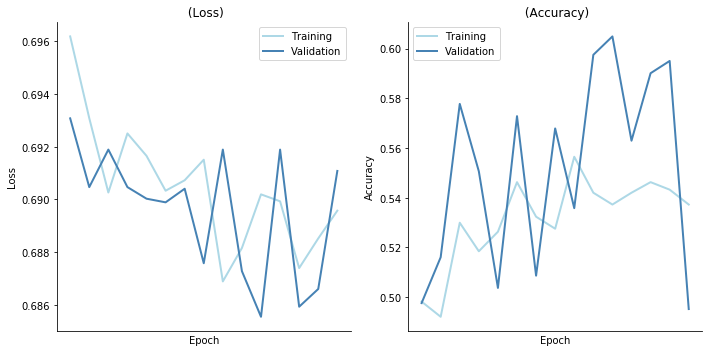

In [30]:
plot_metrics(model3_metrics)